# Testing notebook

The purpose of this notebook is to test the implemented classifiers and compare them. Mainly, a python notebook is great for making plots.

## Preparations

In [13]:
# imports
from RandomForestRegressor import RandomForestRegressor
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np

RANDOM_STATE = 42

## Generate sample dataset

We'll create a sample dataset with 1000 samples and 2 dimesions for easy plotting.

In [14]:
# create a sample dataset, it should have 2 dimensions for easy plotting
X, y = make_regression(n_samples=600, n_features=2, noise=0.5, random_state=RANDOM_STATE)
# split the dataset into training and testing sets
X_train, X_test = X[:500], X[500:]
y_train, y_test = y[:500], y[500:]

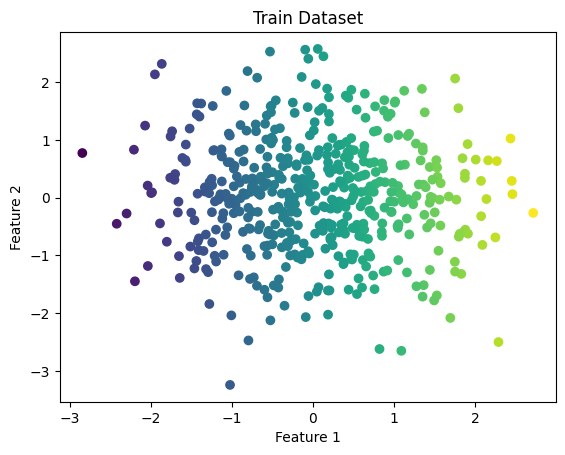

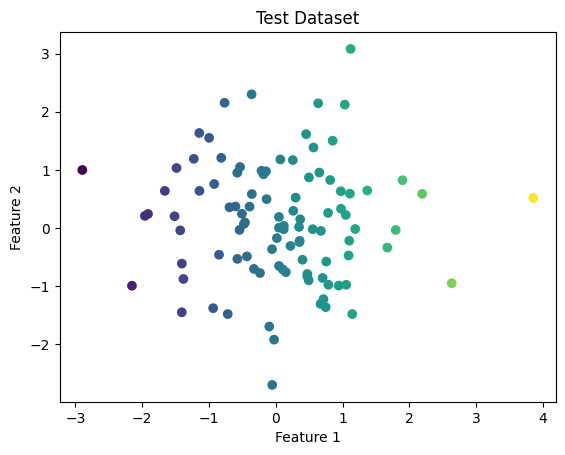

In [15]:
# plot the train dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='viridis')
plt.title('Train Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()  

# plot the test dataset
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis')
plt.title('Test Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Testing regressors

### Random Forest Regressor

In [16]:
# create instance of RandomForestRegressor
model = RandomForestRegressor(n_estimators=10, max_depth=5, random_state=RANDOM_STATE)
# fit the model
model.fit(X_train, y_train)
# make predictions
predictions = model.predict(X_test)

R^2 Score: 0.9799493444209417


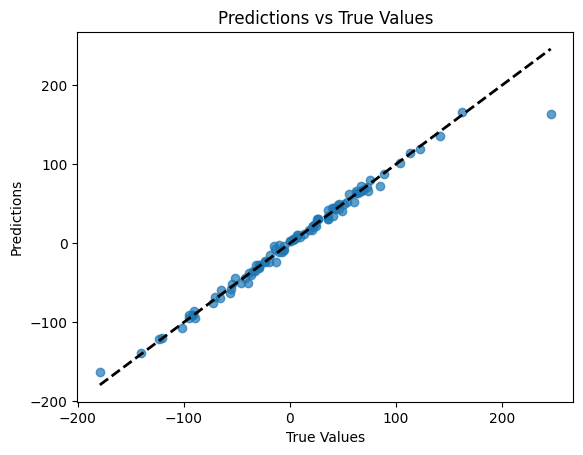

In [17]:
# calculate the R^2 score
r2_score = model.score(X_test, y_test)
print(f'R^2 Score: {r2_score}')

# plot the predictions vs true values
plt.scatter(y_test, predictions, alpha=0.7)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Predictions vs True Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

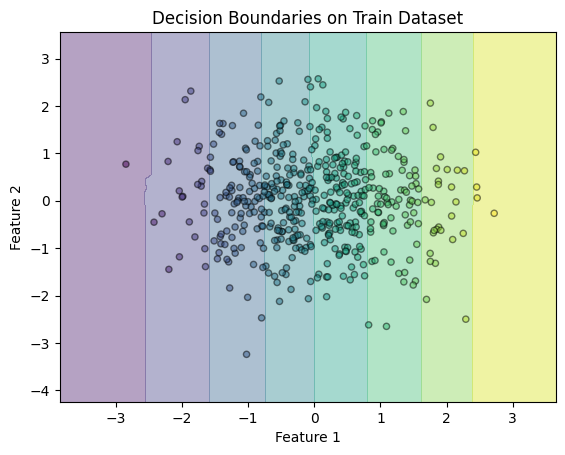

In [26]:
# plot the decision boundaries on the train dataset
# Create a mesh grid
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4, cmap='viridis')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolor='k', cmap='viridis', s=20, alpha=0.5)
plt.title('Decision Boundaries on Train Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()